In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

### Plan:
In this project, we are going to apply different Deep Learning algorithms, LSTM, GRU and 1d CNN to forcast the values of google stocks.
### Description:
 The dataset is a time series, with the attributes Date, open,high,low,close and volume from 2012 to 2017

In [189]:
df= pd.read_csv('/content/Google_Stock_Price_Test.csv')
df_train=pd.read_csv('/content/Google_Stock_Price_Train.csv')

In [190]:
df_train.shape,df_test.shape


((1258, 6), (20, 6))

## Data preprocessing
We know there are no missing values, but we have to change the data types and scale the data , drop the correlated features

In [191]:
df_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [141]:
df_train.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [142]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


We need to convert all the columns to float so we can work with them

In [143]:
df_train['Volume']=df_train['Volume'].str.replace(',','')
df_test['Volume']=df_test['Volume'].str.replace(',','')

In [147]:
#df_train['Close']=df_train['Close'].str.replace(',','')
#df_test['Close']=df_test['Close'].str.replace(',','')

In [148]:
df_train['Close'] = pd.to_numeric(df_train['Close'] )
df_test['Close']  = pd.to_numeric(df_test['Close'] )
df_train['Volume'] = pd.to_numeric(df_train['Volume'] )
df_test['Volume']  = pd.to_numeric(df_test['Volume'] )

<ipython-input-149-51ea357d1158>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_train.corr()


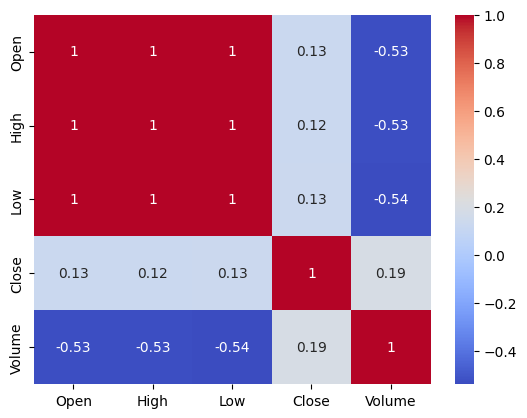

In [149]:
corr=df_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

When taking a look at the correlation, High and low are strongly correlated, it shows on the grapgh too, so we will drop one of them

<Axes: >

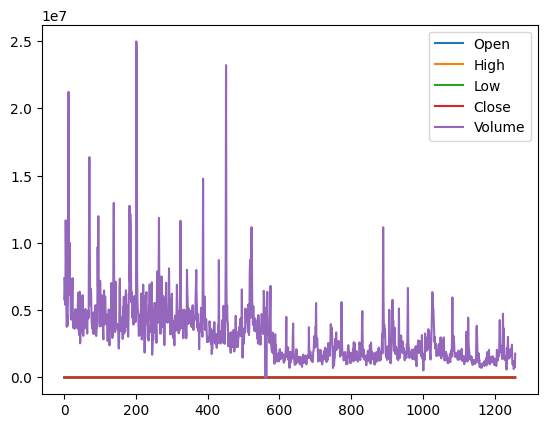

In [150]:
df_train.plot()

This graph shows that the data is not scaled so we're going to use MinMaxscaling

<Axes: >

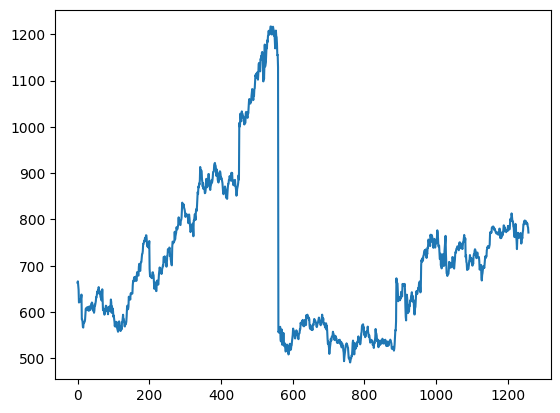

In [151]:
df_train['Close'].plot()

It is important to scale our data

In [152]:
scaler = MinMaxScaler()
df2=scaler.fit_transform(df_train[['Open', 'High', 'Low', 'Close', 'Volume']])
df_train_scaled=pd.DataFrame(df2, columns=['Open', 'High', 'Low', 'Close', 'Volume'])
df_train_scaled['Date']=df_train['Date']

<Axes: >

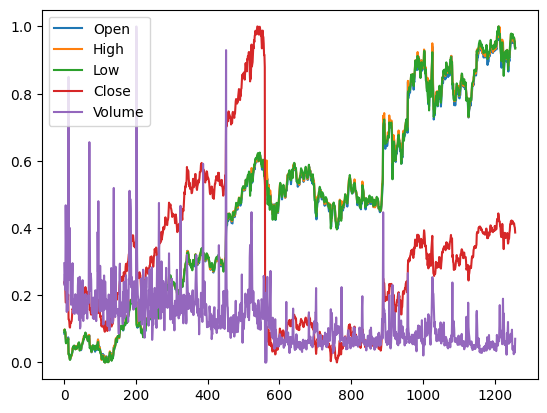

In [153]:
df_train_scaled.plot()

In [154]:
scaler = MinMaxScaler()
df2=scaler.fit_transform(df_test[['Open', 'High', 'Low', 'Close', 'Volume']])
df_test_scaled=pd.DataFrame(df2, columns=['Open', 'High', 'Low', 'Close', 'Volume'])
df_test_scaled['Date']=df_test['Date']

In [155]:
df_train_scaled=df_train_scaled.drop(columns='High')
df_test_scaled=df_test_scaled.drop(columns='High')

In [156]:
df_test_scaled

,Open,Low,Close,Volume,Date
0,0.000000,0.000000,0.000000,0.317106,1/3/2017
1,0.161864,0.143722,0.015344,0.066042,1/4/2017
2,0.123220,0.180043,0.159095,0.178705,1/5/2017
3,0.278814,0.320250,0.403998,0.309758,1/6/2017
4,0.467627,0.527827,0.414092,0.151721,1/9/2017
5,0.492373,0.541105,0.376539,0.110643,1/10/2017
6,0.443898,0.499317,0.439532,0.062991,1/11/2017
7,0.480169,0.456356,0.408237,0.186396,1/12/2017
8,0.485932,0.603202,0.438926,0.077300,1/13/2017
9,0.479153,0.479789,0.372905,0.190263,1/17/2017


### Cyclical encoding
We need our model to understand that there's a seasonality in our data, so we tried to use cyclical encoding. We finally left that approach because the model was too complex

In [157]:
df_train_scaled['Date'] = df_train['Date']
#df_train_scaled= df_train_scaled.drop(columns='Date')
df_test_scaled['Date']= df_test['Date']
#df_test_scaled= df_test_scaled.drop(columns='Date')

In [158]:
df_test_scaled= df_test_scaled.drop(columns='Low')
df_train_scaled= df_train_scaled.drop(columns='Low')

In [159]:
df_train_scaled['Date'] = pd.to_datetime(df_train_scaled['Date'])
df_test_scaled['Date'] = pd.to_datetime(df_test_scaled['Date'])

We finally decided not to work with the cyclical encoding because it added compexity to our model, but it is still good practice in other cases

In [160]:
# encode the day, month, and year as sin/cos values
#df_train_scaled['day_sin'] = np.sin(2 * np.pi * df_train_scaled['Date'].dt.dayofyear / 365)
#df_train_scaled['day_cos'] = np.cos(2 * np.pi * df_train_scaled['Date'].dt.dayofyear / 365)
#df_train_scaled['month_sin'] = np.sin(2 * np.pi * df_train_scaled['Date'].dt.month / 12)
#df_train_scaled['month_cos'] = np.cos(2 * np.pi * df_train_scaled['Date'].dt.month / 12)
#df_train_scaled['year_sin'] = np.sin(2 * np.pi * (df_train_scaled['Date'].dt.year - df_train_scaled['Date'].dt.year.min()) / (df_train_scaled['Date'].dt.year.max() - df_train_scaled['Date'].dt.year.min()))
#df_train_scaled['year_cos'] = np.cos(2 * np.pi * (df_train_scaled['Date'].dt.year - df_train_scaled['Date'].dt.year.min()) / (df_train_scaled['Date'].dt.year.max() - df_train_scaled['Date'].dt.year.min()))


In [161]:
# encode the day, month, and year as sin/cos values
#df_test_scaled['day_sin'] = np.sin(2 * np.pi * df_test_scaled['Date'].dt.dayofyear / 365)
#df_test_scaled['day_cos'] = np.cos(2 * np.pi * df_test_scaled['Date'].dt.dayofyear / 365)
#df_test_scaled['month_sin'] = np.sin(2 * np.pi * df_test_scaled['Date'].dt.month / 12)
#df_test_scaled['month_cos'] = np.cos(2 * np.pi * df_test_scaled['Date'].dt.month / 12)
#df_test_scaled['year_sin'] = np.sin(2 * np.pi * (df_test_scaled['Date'].dt.year - df_test_scaled['Date'].dt.year.min()) / (df_test_scaled['Date'].dt.year.max() - df_test_scaled['Date'].dt.year.min()))
#df_test_scaled['year_cos'] = np.cos(2 * np.pi * (df_test_scaled['Date'].dt.year - df_test_scaled['Date'].dt.year.min()) / (df_test_scaled['Date'].dt.year.max() - df_test_scaled['Date'].dt.year.min()))


Putting the Dtae as index

In [162]:
df_test_scaled.index = df_test_scaled['Date']
df_test_scaled = df_test_scaled.drop(columns='Date')
df_train_scaled.index = df_train_scaled['Date']
df_train_scaled = df_train_scaled.drop(columns='Date')

In [163]:
df_test_scaled.head()

,Open,Close,Volume
Date,,,
2017-01-03,0.000000,0.000000,0.317106
2017-01-04,0.161864,0.015344,0.066042
2017-01-05,0.123220,0.159095,0.178705
2017-01-06,0.278814,0.403998,0.309758
2017-01-09,0.467627,0.414092,0.151721


In [164]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam

Merging the two datasets for easier manipulation

In [165]:
df=pd.concat([df_train_scaled, df_test_scaled])
df

,Open,Close,Volume
Date,,,
2012-01-03,0.085814,0.237573,0.295258
2012-01-04,0.097012,0.241514,0.229936
2012-01-05,0.094334,0.228781,0.263612
2012-01-06,0.091562,0.216419,0.216179
2012-01-09,0.079842,0.178548,0.467797
...,...,...,...
2017-01-25,0.861186,1.000000,0.247153
2017-01-26,1.000000,0.928932,0.882826
2017-01-27,0.947458,0.750454,0.879345


In this function, we divide our dataset in X and y in a way that when you predict a value of y, you are using the 4 values before it, we will output three features

In [166]:
def df_to_X_y2(df,window=4):
  df_np =df.to_numpy() # enlever si df est déjà an array
  X=[]
  y=[]
  for i in range(len(df_np)-window):
    row=[r for r in df_np[i:i+window]]
    X.append(row)
    label= [df_np[i+window][0],df_np[i+window][1],df_np[i+window][2]]# these are our three outputs
    y.append(label)
  return np.array(X),np.array(y)

In [167]:
X,y=df_to_X_y2 (df)
X.shape,y.shape

((1274, 4, 3), (1274, 3))

Splitting the data

In [168]:
X_train,y_train=X[:1000],y[:1000]
X_val,y_val=X[1000:1100],y[1000:1100]
X_test,y_test=X[1100:],y[1100:]
X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((1000, 4, 3), (1000, 3), (100, 4, 3), (100, 3), (174, 4, 3), (174, 3))

## LSTM
We create an LSTM model, with an input layer of size (4,3), because we are looking 4 steps back and we have 3 attributes. Then an LSTM layer after that a Dense layer of 8, and finally a final output of size 3 with a linar activation function for the 3 values that we want to predict

In [172]:
model1=Sequential()
model1.add(InputLayer((4,3)))
model1.add(LSTM(64))
model1.add(Dense(8,'relu'))
model1.add(Dense(3,'linear'))
model1.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 64)                17408     
                                                                 
 dense_26 (Dense)            (None, 8)                 520       
                                                                 
 dense_27 (Dense)            (None, 3)                 27        
                                                                 
Total params: 17,955
Trainable params: 17,955
Non-trainable params: 0
_________________________________________________________________


In [173]:
cp=ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=mean_squared_error, optimizer= Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError() , MeanAbsoluteError()])

In [174]:
history=model1.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=10, callbacks=[cp])

Epoch 1/10
25/32 [======================>.......] - ETA: 0s - loss: 0.1184 - root_mean_squared_error: 0.3441 - mean_absolute_error: 0.2731

32/32 [==============================] - 10s 233ms/step - loss: 0.1180 - root_mean_squared_error: 0.3435 - mean_absolute_error: 0.2723 - val_loss: 0.2298 - val_root_mean_squared_error: 0.4794 - val_mean_absolute_error: 0.4109
Epoch 2/10
26/32 [=======================>......] - ETA: 0s - loss: 0.1049 - root_mean_squared_error: 0.3239 - mean_absolute_error: 0.2599

32/32 [==============================] - 5s 164ms/step - loss: 0.1064 - root_mean_squared_error: 0.3263 - mean_absolute_error: 0.2623 - val_loss: 0.2027 - val_root_mean_squared_error: 0.4503 - val_mean_absolute_error: 0.3980
Epoch 3/10
28/32 [=========================>....] - ETA: 0s - loss: 0.0964 - root_mean_squared_error: 0.3104 - mean_absolute_error: 0.2526

32/32 [==============================] - 6s 187ms/step - loss: 0.0971 - root_mean_squared_error: 0.3115 - mean_absolute_error: 0.2535 - val_loss: 0.1789 - val_root_mean_squared_error: 0.4229 - val_mean_absolute_error: 0.3833
Epoch 4/10
28/32 [=========================>....] - ETA: 0s - loss: 0.0899 - root_mean_squared_error: 0.2999 - mean_absolute_error: 0.2461

32/32 [==============================] - 6s 192ms/step - loss: 0.0888 - root_mean_squared_error: 0.2979 - mean_absolute_error: 0.2448 - val_loss: 0.1580 - val_root_mean_squared_error: 0.3975 - val_mean_absolute_error: 0.3676
Epoch 5/10
31/32 [============================>.] - ETA: 0s - loss: 0.0808 - root_mean_squared_error: 0.2842 - mean_absolute_error: 0.2349

32/32 [==============================] - 6s 186ms/step - loss: 0.0808 - root_mean_squared_error: 0.2843 - mean_absolute_error: 0.2350 - val_loss: 0.1388 - val_root_mean_squared_error: 0.3725 - val_mean_absolute_error: 0.3502
Epoch 6/10
28/32 [=========================>....] - ETA: 0s - loss: 0.0729 - root_mean_squared_error: 0.2700 - mean_absolute_error: 0.2235

32/32 [==============================] - 6s 188ms/step - loss: 0.0732 - root_mean_squared_error: 0.2705 - mean_absolute_error: 0.2239 - val_loss: 0.1205 - val_root_mean_squared_error: 0.3471 - val_mean_absolute_error: 0.3316
Epoch 7/10
25/32 [======================>.......] - ETA: 0s - loss: 0.0670 - root_mean_squared_error: 0.2589 - mean_absolute_error: 0.2138

32/32 [==============================] - 6s 190ms/step - loss: 0.0659 - root_mean_squared_error: 0.2568 - mean_absolute_error: 0.2119 - val_loss: 0.1040 - val_root_mean_squared_error: 0.3225 - val_mean_absolute_error: 0.3115
Epoch 8/10
25/32 [======================>.......] - ETA: 0s - loss: 0.0581 - root_mean_squared_error: 0.2410 - mean_absolute_error: 0.1976

32/32 [==============================] - 6s 193ms/step - loss: 0.0590 - root_mean_squared_error: 0.2429 - mean_absolute_error: 0.1998 - val_loss: 0.0910 - val_root_mean_squared_error: 0.3016 - val_mean_absolute_error: 0.2934
Epoch 9/10
29/32 [==========================>...] - ETA: 0s - loss: 0.0531 - root_mean_squared_error: 0.2305 - mean_absolute_error: 0.1879

32/32 [==============================] - 6s 185ms/step - loss: 0.0521 - root_mean_squared_error: 0.2283 - mean_absolute_error: 0.1864 - val_loss: 0.0780 - val_root_mean_squared_error: 0.2793 - val_mean_absolute_error: 0.2719
Epoch 10/10
31/32 [============================>.] - ETA: 0s - loss: 0.0448 - root_mean_squared_error: 0.2116 - mean_absolute_error: 0.1715

32/32 [==============================] - 6s 186ms/step - loss: 0.0446 - root_mean_squared_error: 0.2113 - mean_absolute_error: 0.1713 - val_loss: 0.0650 - val_root_mean_squared_error: 0.2550 - val_mean_absolute_error: 0.2478


The loss is really low, we need to make the predictions and plto them

In [175]:
def plot_predictions2(model, X, y, start=0, end=100):
  predictions = model.predict(X)
  open_preds, close_preds,volume_preds = predictions[:, 0], predictions[:, 1],predictions[:, 2]
  open_actuals, close_actuals,volume_actuals = y[:, 0], y[:, 1],y[:, 2]
  df = pd.DataFrame(data={'Open Predictions': open_preds,
                          'Open Actuals':open_actuals,
                          'Close Predictions': close_preds,
                          'Close Actuals': close_actuals,
                          'Volume Predictions': volume_preds,
                          'Volume Actuals': volume_actuals
                          })
  plt.plot(df['Open Predictions'][start:end])
  plt.plot(df['Open Actuals'][start:end])
  plt.plot(df['Close Predictions'][start:end])
  plt.plot(df['Close Actuals'][start:end])
  plt.plot(df['Volume Predictions'][start:end])
  plt.plot(df['Volume Actuals'][start:end])
  return df[start:end]

6/6 [==============================] - 1s 4ms/step


,Open Predictions,Open Actuals,Close Predictions,Close Actuals,Volume Predictions,Volume Actuals
0,0.523924,0.795707,0.125241,0.315436,-0.184449,0.076956
1,0.524491,0.821564,0.126918,0.322575,-0.185317,0.064930
2,0.527427,0.825489,0.129717,0.320990,-0.187557,0.062811
3,0.533221,0.827610,0.130710,0.332759,-0.190463,0.078738
4,0.537785,0.841990,0.134815,0.336976,-0.193591,0.084966
...,...,...,...,...,...,...
95,0.600892,0.931133,0.150718,0.391219,-0.227166,0.037056
96,0.602493,0.927506,0.150265,0.406185,-0.228028,0.046736
97,0.603195,0.944155,0.151253,0.402230,-0.228537,0.054650
98,0.604664,0.938760,0.152141,0.406461,-0.229512,0.037225


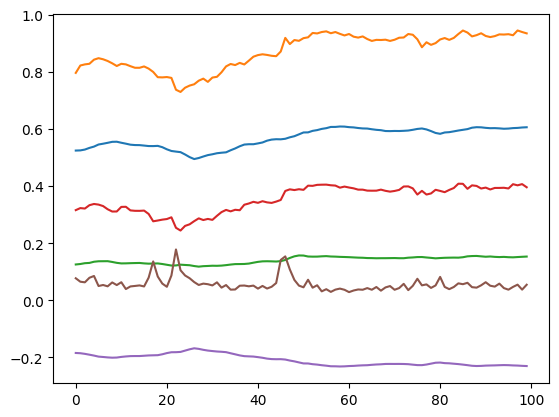

In [176]:
plot_predictions2(model1, X_test, y_test)

The predictions are a littl bit off but this needs to be addressed, it is overfitting, because we don't have enough data.
We will contine to workon this data to see if other algorithms can perform better

## Adding 1d CNN

In [177]:
model2=Sequential()
model2.add(InputLayer((4,3)))
model2.add(Conv1D(64, kernel_size=2, activation='relu'))
model2.add(Flatten())
model2.add(Dense(8,'relu'))
model2.add(Dense(3,'linear'))
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 3, 64)             448       
                                                                 
 flatten_7 (Flatten)         (None, 192)               0         
                                                                 
 dense_28 (Dense)            (None, 8)                 1544      
                                                                 
 dense_29 (Dense)            (None, 3)                 27        
                                                                 
Total params: 2,019
Trainable params: 2,019
Non-trainable params: 0
_________________________________________________________________


In [178]:
cp2=ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=mean_squared_error, optimizer= Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError() , MeanAbsoluteError()])

In [179]:
history=model2.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
23/32 [====================>.........] - ETA: 0s - loss: 0.1632 - root_mean_squared_error: 0.4040 - mean_absolute_error: 0.3135 

32/32 [==============================] - 3s 71ms/step - loss: 0.1618 - root_mean_squared_error: 0.4022 - mean_absolute_error: 0.3108 - val_loss: 0.2778 - val_root_mean_squared_error: 0.5271 - val_mean_absolute_error: 0.4241
Epoch 2/10
22/32 [===================>..........] - ETA: 0s - loss: 0.1446 - root_mean_squared_error: 0.3803 - mean_absolute_error: 0.2886

32/32 [==============================] - 2s 49ms/step - loss: 0.1403 - root_mean_squared_error: 0.3746 - mean_absolute_error: 0.2839 - val_loss: 0.2600 - val_root_mean_squared_error: 0.5099 - val_mean_absolute_error: 0.4053
Epoch 3/10
23/32 [====================>.........] - ETA: 0s - loss: 0.1237 - root_mean_squared_error: 0.3517 - mean_absolute_error: 0.2639

32/32 [==============================] - 1s 44ms/step - loss: 0.1280 - root_mean_squared_error: 0.3578 - mean_absolute_error: 0.2699 - val_loss: 0.2559 - val_root_mean_squared_error: 0.5059 - val_mean_absolute_error: 0.3992
Epoch 4/10
19/32 [================>.............] - ETA: 0s - loss: 0.1229 - root_mean_squared_error: 0.3506 - mean_absolute_error: 0.2627

32/32 [==============================] - 1s 33ms/step - loss: 0.1215 - root_mean_squared_error: 0.3485 - mean_absolute_error: 0.2610 - val_loss: 0.2541 - val_root_mean_squared_error: 0.5040 - val_mean_absolute_error: 0.3956
Epoch 5/10
18/32 [===============>..............] - ETA: 0s - loss: 0.1159 - root_mean_squared_error: 0.3404 - mean_absolute_error: 0.2541

32/32 [==============================] - 1s 32ms/step - loss: 0.1158 - root_mean_squared_error: 0.3403 - mean_absolute_error: 0.2533 - val_loss: 0.2525 - val_root_mean_squared_error: 0.5025 - val_mean_absolute_error: 0.3918
Epoch 6/10
19/32 [================>.............] - ETA: 0s - loss: 0.1106 - root_mean_squared_error: 0.3326 - mean_absolute_error: 0.2462

32/32 [==============================] - 1s 33ms/step - loss: 0.1110 - root_mean_squared_error: 0.3332 - mean_absolute_error: 0.2461 - val_loss: 0.2502 - val_root_mean_squared_error: 0.5002 - val_mean_absolute_error: 0.3887
Epoch 7/10
16/32 [==============>...............] - ETA: 0s - loss: 0.1107 - root_mean_squared_error: 0.3327 - mean_absolute_error: 0.2438

32/32 [==============================] - 1s 33ms/step - loss: 0.1056 - root_mean_squared_error: 0.3250 - mean_absolute_error: 0.2381 - val_loss: 0.2421 - val_root_mean_squared_error: 0.4920 - val_mean_absolute_error: 0.3805
Epoch 8/10
18/32 [===============>..............] - ETA: 0s - loss: 0.1034 - root_mean_squared_error: 0.3216 - mean_absolute_error: 0.2344

32/32 [==============================] - 1s 33ms/step - loss: 0.0994 - root_mean_squared_error: 0.3152 - mean_absolute_error: 0.2283 - val_loss: 0.2325 - val_root_mean_squared_error: 0.4822 - val_mean_absolute_error: 0.3705
Epoch 9/10
19/32 [================>.............] - ETA: 0s - loss: 0.0971 - root_mean_squared_error: 0.3116 - mean_absolute_error: 0.2246

32/32 [==============================] - 1s 32ms/step - loss: 0.0935 - root_mean_squared_error: 0.3058 - mean_absolute_error: 0.2184 - val_loss: 0.2225 - val_root_mean_squared_error: 0.4717 - val_mean_absolute_error: 0.3596
Epoch 10/10
20/32 [=================>............] - ETA: 0s - loss: 0.0891 - root_mean_squared_error: 0.2985 - mean_absolute_error: 0.2107

32/32 [==============================] - 1s 32ms/step - loss: 0.0876 - root_mean_squared_error: 0.2959 - mean_absolute_error: 0.2084 - val_loss: 0.2115 - val_root_mean_squared_error: 0.4599 - val_mean_absolute_error: 0.3487


6/6 [==============================] - 0s 3ms/step


,Open Predictions,Open Actuals,Close Predictions,Close Actuals,Volume Predictions,Volume Actuals
0,0.068550,0.795707,0.073633,0.315436,0.027997,0.076956
1,0.065884,0.821564,0.077006,0.322575,0.030832,0.064930
2,0.068488,0.825489,0.073947,0.320990,0.028172,0.062811
3,0.065391,0.827610,0.080409,0.332759,0.032634,0.078738
4,0.066341,0.841990,0.079388,0.336976,0.031707,0.084966
...,...,...,...,...,...,...
95,0.068531,0.931133,0.085301,0.391219,0.033370,0.037056
96,0.068837,0.927506,0.085415,0.406185,0.033276,0.046736
97,0.068353,0.944155,0.084932,0.402230,0.033286,0.054650
98,0.069835,0.938760,0.083526,0.406461,0.031926,0.037225


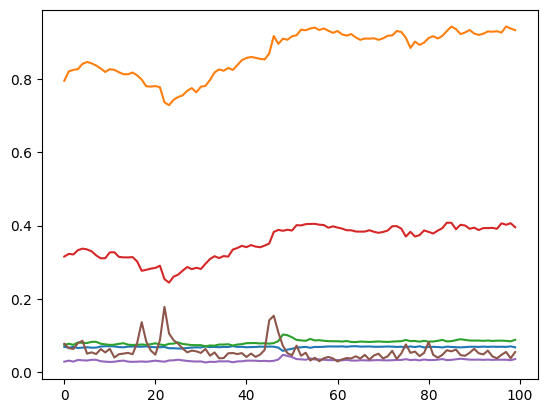

In [180]:
plot_predictions2(model2, X_test, y_test)

## GRU

In [181]:
model3=Sequential()
model3.add(InputLayer((4,3)))
model3.add(Conv1D(64, kernel_size=2, activation='relu'))
model3.add(Flatten())
model3.add(Dense(8,'relu'))
model3.add(Dense(3,'linear'))
model3.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 3, 64)             448       
                                                                 
 flatten_8 (Flatten)         (None, 192)               0         
                                                                 
 dense_30 (Dense)            (None, 8)                 1544      
                                                                 
 dense_31 (Dense)            (None, 3)                 27        
                                                                 
Total params: 2,019
Trainable params: 2,019
Non-trainable params: 0
_________________________________________________________________


In [182]:
cp3=ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=mean_squared_error, optimizer= Adam(learning_rate=0.0001),metrics=[RootMeanSquaredError() , MeanAbsoluteError()])

In [183]:
history=model2.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=10, callbacks=[cp2])

Epoch 1/10
30/32 [===========================>..] - ETA: 0s - loss: 0.0818 - root_mean_squared_error: 0.2860 - mean_absolute_error: 0.1991

32/32 [==============================] - 2s 64ms/step - loss: 0.0815 - root_mean_squared_error: 0.2854 - mean_absolute_error: 0.1987 - val_loss: 0.1997 - val_root_mean_squared_error: 0.4468 - val_mean_absolute_error: 0.3365
Epoch 2/10
32/32 [==============================] - ETA: 0s - loss: 0.0753 - root_mean_squared_error: 0.2745 - mean_absolute_error: 0.1892

32/32 [==============================] - 1s 46ms/step - loss: 0.0753 - root_mean_squared_error: 0.2745 - mean_absolute_error: 0.1892 - val_loss: 0.1873 - val_root_mean_squared_error: 0.4328 - val_mean_absolute_error: 0.3228
Epoch 3/10
20/32 [=================>............] - ETA: 0s - loss: 0.0718 - root_mean_squared_error: 0.2680 - mean_absolute_error: 0.1836

32/32 [==============================] - 1s 34ms/step - loss: 0.0692 - root_mean_squared_error: 0.2631 - mean_absolute_error: 0.1806 - val_loss: 0.1739 - val_root_mean_squared_error: 0.4170 - val_mean_absolute_error: 0.3090
Epoch 4/10
18/32 [===============>..............] - ETA: 0s - loss: 0.0633 - root_mean_squared_error: 0.2516 - mean_absolute_error: 0.1730

32/32 [==============================] - 1s 39ms/step - loss: 0.0631 - root_mean_squared_error: 0.2512 - mean_absolute_error: 0.1721 - val_loss: 0.1601 - val_root_mean_squared_error: 0.4001 - val_mean_absolute_error: 0.2936
Epoch 5/10
28/32 [=========================>....] - ETA: 0s - loss: 0.0563 - root_mean_squared_error: 0.2372 - mean_absolute_error: 0.1619

32/32 [==============================] - 1s 46ms/step - loss: 0.0571 - root_mean_squared_error: 0.2389 - mean_absolute_error: 0.1637 - val_loss: 0.1468 - val_root_mean_squared_error: 0.3831 - val_mean_absolute_error: 0.2772
Epoch 6/10
28/32 [=========================>....] - ETA: 0s - loss: 0.0509 - root_mean_squared_error: 0.2256 - mean_absolute_error: 0.1546

32/32 [==============================] - 1s 39ms/step - loss: 0.0513 - root_mean_squared_error: 0.2265 - mean_absolute_error: 0.1557 - val_loss: 0.1332 - val_root_mean_squared_error: 0.3650 - val_mean_absolute_error: 0.2590
Epoch 7/10
19/32 [================>.............] - ETA: 0s - loss: 0.0453 - root_mean_squared_error: 0.2130 - mean_absolute_error: 0.1477

32/32 [==============================] - 1s 33ms/step - loss: 0.0457 - root_mean_squared_error: 0.2139 - mean_absolute_error: 0.1482 - val_loss: 0.1199 - val_root_mean_squared_error: 0.3463 - val_mean_absolute_error: 0.2411
Epoch 8/10
18/32 [===============>..............] - ETA: 0s - loss: 0.0420 - root_mean_squared_error: 0.2048 - mean_absolute_error: 0.1424

32/32 [==============================] - 1s 33ms/step - loss: 0.0406 - root_mean_squared_error: 0.2015 - mean_absolute_error: 0.1410 - val_loss: 0.1072 - val_root_mean_squared_error: 0.3273 - val_mean_absolute_error: 0.2231
Epoch 9/10
20/32 [=================>............] - ETA: 0s - loss: 0.0367 - root_mean_squared_error: 0.1915 - mean_absolute_error: 0.1338

32/32 [==============================] - 1s 32ms/step - loss: 0.0359 - root_mean_squared_error: 0.1896 - mean_absolute_error: 0.1347 - val_loss: 0.0950 - val_root_mean_squared_error: 0.3083 - val_mean_absolute_error: 0.2052
Epoch 10/10
17/32 [==============>...............] - ETA: 0s - loss: 0.0332 - root_mean_squared_error: 0.1821 - mean_absolute_error: 0.1313

32/32 [==============================] - 1s 32ms/step - loss: 0.0318 - root_mean_squared_error: 0.1784 - mean_absolute_error: 0.1290 - val_loss: 0.0837 - val_root_mean_squared_error: 0.2892 - val_mean_absolute_error: 0.1878


6/6 [==============================] - 0s 2ms/step


,Open Predictions,Open Actuals,Close Predictions,Close Actuals,Volume Predictions,Volume Actuals
0,0.315427,0.795707,0.268218,0.315436,0.066050,0.076956
1,0.316009,0.821564,0.268733,0.322575,0.066122,0.064930
2,0.317318,0.825489,0.269892,0.320990,0.066284,0.062811
3,0.322071,0.827610,0.274099,0.332759,0.066872,0.078738
4,0.323927,0.841990,0.275743,0.336976,0.067102,0.084966
...,...,...,...,...,...,...
95,0.350705,0.931133,0.299448,0.391219,0.070418,0.037056
96,0.351319,0.927506,0.299991,0.406185,0.070494,0.046736
97,0.350489,0.944155,0.299256,0.402230,0.070391,0.054650
98,0.351371,0.938760,0.300037,0.406461,0.070501,0.037225


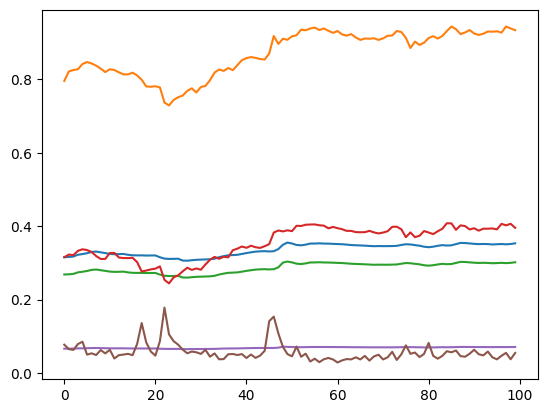

In [184]:
plot_predictions2(model2, X_test, y_test)

## Conclusion
We worked on three different algorithms to predict the stocks , but we ncountered a problem of overfitting. We had very low values for loss but the models were not generalizing on the test data as we saw on the graphs.
We tried different techniques to correct that overfitting :

 -Trying to make the model less complex
- Reducing the number of parameters, we tried to encode the cycles of days, months and years .

Finally the best results were still overfitting, because we didn't have enough data. We would propose to do some data augmentation to solve this problem 